# Walk Score

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
city = 'San_Diego'

In [76]:
page = requests.get('https://www.walkscore.com/CA/'+city)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.table('tr')[1:]
alldat = []
for entry in table:
    split = entry.get_text().split()
    data = {
            'City': city.replace('_', ' '),
            'Neighborhood': ' '.join(split[1:-4]),
            'Walk': float(split[-4].replace('-','nan')),
            'Transit': float(split[-3].replace('-','nan')),
            'Bike': float(split[-2].replace('-','nan')),
            'Pop': int(split[-1].replace(',','')),
            'logpop': np.log(int(split[-1].replace(',','')))
        }
    alldat.append(data)

In [77]:
ws = pd.DataFrame(alldat)

In [78]:
ws

,Bike,City,Neighborhood,Pop,Transit,Walk,logpop
0,65.0,San Diego,Core-Columbia,5338,81.0,98.0,8.582606
1,82.0,San Diego,Horton Plaza,1474,81.0,97.0,7.295735
2,66.0,San Diego,Little Italy,3169,77.0,97.0,8.061171
3,77.0,San Diego,Gaslamp,976,80.0,97.0,6.883463
4,74.0,San Diego,Harborview,525,75.0,97.0,6.263398
5,54.0,San Diego,Cortez,3447,78.0,94.0,8.145260
6,84.0,San Diego,Marina,5600,79.0,94.0,8.630522
7,64.0,San Diego,East Village,10148,78.0,93.0,9.225032
8,52.0,San Diego,Village,4491,33.0,88.0,8.409831
9,59.0,San Diego,Sherman Heights,3340,68.0,87.0,8.113726


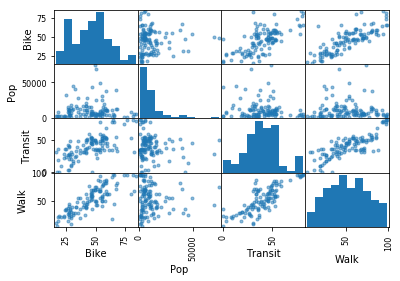

In [6]:
scatter = pd.scatter_matrix(ws)

In [6]:
import shapefile

In [7]:
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm
ca_neighborhoods = shapefile.Reader("Data/CA Neighborhoods/ZillowNeighborhoods-CA.shp")
ca_neighborhood_metadata = ca_neighborhoods.shapeRecords()

In [8]:
sd_neighborhood_list = []
for i in range(len(ca_neighborhood_metadata)):
    if ca_neighborhood_metadata[i].record[2] == 'San Diego':
        sd_neighborhood_list.append(i)

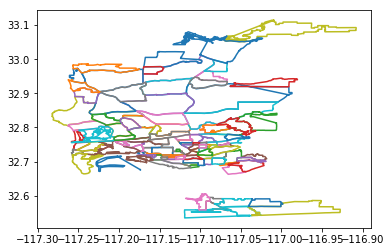

In [10]:
for i in sd_neighborhood_list:
    shape = ca_neighborhoods.shapes()[i]
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])

# Census

In [12]:
import shapefile

In [13]:
#2015 census tracts
#https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html
ca_tracts = shapefile.Reader("Data/CA Census Tracts/cb_2015_06_tract_500k.shp")

In [14]:
ca_tract_metadata = ca_tracts.shapeRecords()

In [15]:
sd_tract_list = []
for i in range(len(ca_tract_metadata)):
    if ca_tract_metadata[i].record[1] == '073':
        sd_tract_list.append(i)

In [16]:
len(sd_tract_list)

627

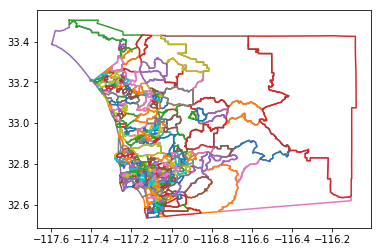

In [17]:
for i in sd_tract_list:
    shape = ca_tracts.shapes()[i]
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])

# Matching tracts and neighborhoods

Example

In [17]:
import shapely
from shapely.geometry import Polygon

In [18]:
tract_shape = ca_tracts.shapes()[sd_tract_list[0]]
tract_poly = Polygon(tract_shape.points)

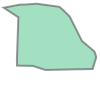

In [19]:
tract_poly

In [18]:
coverages = []
for i in sd_neighborhood_list:
    neighborhood_shape = ca_neighborhoods.shapes()[i]
    neighborhood_poly = Polygon(neighborhood_shape.points)
    
    area = tract_poly.area
    intersect_area = tract_poly.intersection(neighborhood_poly).area
    coverage = intersect_area/area
    coverages.append(coverage) 
    if coverage > .5:
        break
best_neighborhood = sd_neighborhood_list[np.argmax(coverages)]
best_coverage = np.max(coverages)

In [19]:
neighborhood_shape = ca_neighborhoods.shapes()[best_neighborhood]
neighborhood_poly = Polygon(neighborhood_shape.points)

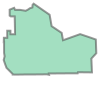

In [20]:
neighborhood_poly

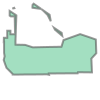

In [21]:
neighborhood_poly.difference(tract_poly)

In [22]:
best_coverage

0.96740606489498049

Populate full dictionary

In [ ]:
tract_coverage = {i: {} for i in sd_tract_list}
counter = 0
for i in sd_tract_list:
    tract_shape = ca_tracts.shapes()[i]
    tract_poly = Polygon(tract_shape.points).buffer(0)
    
    for j in sd_neighborhood_list:
        neighborhood_shape = ca_neighborhoods.shapes()[j]
        neighborhood_poly = Polygon(neighborhood_shape.points).buffer(0)

        area = tract_poly.area
        intersect_area = tract_poly.intersection(neighborhood_poly).area
        coverage = 0 if area == 0 else intersect_area/area
        if coverage > 0:
            tract_coverage[i][j] = coverage
    counter += 1
    print("%s / %s" %(counter, len(sd_tract_list)))

In [28]:
import json
with open('Data/tract_coverage.json', 'w') as fp:
    json.dump(tract_coverage, fp)

In [20]:
import json
with open('Data/tract_coverage.json', 'r') as fp:
    tract_coverage = json.load(fp)
tract_coverage = dict([
    (int(k), dict([(int(k2),v2) for k2,v2 in v.items()])) 
    for k, v in tract_coverage.items()])

In [24]:
neighborhood_coverage = {i: {} for i in sd_neighborhood_list}
for i in sd_neighborhood_list:
    for j in sd_tract_list:
        if i in tract_coverage[j].keys():
            neighborhood_coverage[i][j] = tract_coverage[j][i]

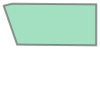

In [25]:
neighborhood_shape = ca_neighborhoods.shapes()[list(neighborhood_coverage.keys())[1]]
neighborhood_poly = Polygon(neighborhood_shape.points).buffer(0)
neighborhood_poly

In [98]:
tract_polygons = []
for key in neighborhood_coverage[list(neighborhood_coverage.keys())[1]]:
    tract_shape = ca_tracts.shapes()[key]
    tract_poly = Polygon(tract_shape.points).buffer(-0.00001)
    tract_polygons.append(tract_poly)

In [99]:
from shapely.geometry import MultiPolygon

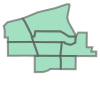

In [100]:
MultiPolygon(tract_polygons)

In [173]:
import json
with open('Data/neighborhood_coverage.json', 'w') as fp:
    json.dump(neighborhood_coverage, fp)

In [21]:
import json
with open('Data/neighborhood_coverage.json', 'r') as fp:
    neighborhood_coverage = json.load(fp)
neighborhood_coverage = dict([
    (int(k), dict([(int(k2),v2) for k2,v2 in v.items()])) 
    for k, v in neighborhood_coverage.items()])

# Tract populations

In [27]:
import pandas as pd

In [28]:
tract_pop = pd.read_csv('Data/Tract Populations/ACS_15_5YR_B01003_with_ann.csv',
                 skiprows = [0])
tract_pop = tract_pop[['Geography', 'Estimate; Total']]
tract_pop.columns = ['Tract', "Population"]

In [29]:
for i, row in tract_pop.iterrows():
    start = 13
    end = row.Tract.find(",")
    tract_pop.set_value(i,'Tract',row.Tract[start:end])

In [ ]:
sd_tract_ids = {}
for i in sd_tract_list:
    tract_id = ca_tracts.shapeRecords()[i].record[2]
    start = str(int(tract_id[:-2]))
    end = tract_id[-2:]
    if end !='00':
        cleaned_id = '.'.join([start,end])
    else:
        cleaned_id = start
    sd_tract_ids[i] = cleaned_id

In [30]:
import json
with open('Data/sd_tract_ids.json', 'w') as fp:
    json.dump(sd_tract_ids, fp)

In [30]:
import json
with open('Data/sd_tract_ids.json', 'r') as fp:
    sd_tract_ids = json.load(fp)
sd_tract_ids = dict([(int(k), v) for k, v in sd_tract_ids.items()])

# Neighborhood populations

In [31]:
neighborhood_names = [ca_neighborhood_metadata[i].record[3] for i in sd_neighborhood_list]
neighborhood_pop = []
for i in sd_neighborhood_list:
    tracts_in_neighborhood = neighborhood_coverage[i]
    partial_sum = 0
    for tract in tracts_in_neighborhood.keys():
        tract_id = sd_tract_ids[tract]
        contribution = tracts_in_neighborhood[tract]
        pop = tract_pop.loc[tract_pop['Tract'] == tract_id, 'Population'].values[0]
        partial_sum += pop*contribution
    neighborhood_pop.append(partial_sum)

In [32]:
neighborhood_pop_census = pd.DataFrame(
    {
        'Neighborhood': neighborhood_names,
        'Population': neighborhood_pop
    }
)

In [33]:
merged = neighborhood_pop_census.merge(ws, left_on='Neighborhood', right_on='Neighborhood')

# How close is our tract based estimate to WalkScore populations?

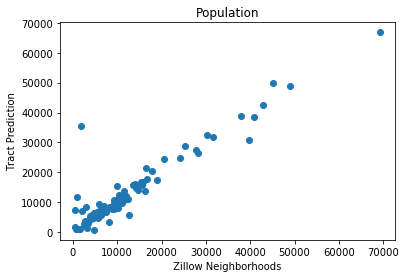

In [34]:
plt.scatter(merged['Pop'], merged["Population"])
plt.xlabel('Zillow Neighborhoods')
plt.ylabel('Tract Prediction')
plt.title('Population')

In [35]:
from scipy import stats
stats.pearsonr(merged['Pop'], merged["Population"])

(0.93905288380046459, 6.5534716159289652e-45)

# Commute times

In [36]:
tract_commutes = pd.read_csv('Data/Commute Time/ACS_15_5YR_B08303_with_ann.csv',
                             skiprows = [0])
time_cols = tract_commutes.columns[np.where(['Estimate' in col for col in tract_commutes.columns])]
selection = np.hstack(['Geography', time_cols])
tract_commutes = tract_commutes[selection]
tract_commutes.columns = [
   'Tract', 
   'Commuters',
   'Commute Time Less than 5 minutes',
   'Commute Time 5 to 9 minutes',
   'Commute Time 10 to 14 minutes',
   'Commute Time 15 to 19 minutes',
   'Commute Time 20 to 24 minutes',
   'Commute Time 25 to 29 minutes',
   'Commute Time 30 to 34 minutes',
   'Commute Time 35 to 39 minutes',
   'Commute Time 40 to 44 minutes',
   'Commute Time 45 to 59 minutes',
   'Commute Time 60 to 89 minutes',
   'Commute Time 90 or more minutes'
]
for i, row in tract_commutes.iterrows():
    start = 13
    end = row.Tract.find(",")
    tract_commutes.set_value(i,'Tract',row.Tract[start:end])

In [37]:
neighborhood_names = [ca_neighborhood_metadata[i].record[3] for i in sd_neighborhood_list]
commute_dict = {col: [] for col in tract_commutes.columns[1:]}

for i in sd_neighborhood_list:
    tracts_in_neighborhood = neighborhood_coverage[i]
    partial_sums = {key: 0 for key in commute_dict.keys()}
    for tract in tracts_in_neighborhood.keys():
        tract_id = sd_tract_ids[tract]
        contribution = tracts_in_neighborhood[tract]
        
        for key in commute_dict.keys():
            value = tract_commutes.loc[tract_commutes['Tract'] == tract_id, key].values[0]
            partial_sums[key] += value*contribution
    for key in commute_dict.keys():
        commute_dict[key].append(partial_sums[key])
commute_dict['Neighborhood'] = neighborhood_names

In [38]:
order = np.hstack([['Neighborhood'], tract_commutes.columns[1:]])

In [39]:
neighborhood_commute_counts = pd.DataFrame(commute_dict)[order]

In [40]:
neighborhood_commute_counts

,Neighborhood,Commuters,Commute Time Less than 5 minutes,Commute Time 5 to 9 minutes,Commute Time 10 to 14 minutes,Commute Time 15 to 19 minutes,Commute Time 20 to 24 minutes,Commute Time 25 to 29 minutes,Commute Time 30 to 34 minutes,Commute Time 35 to 39 minutes,Commute Time 40 to 44 minutes,Commute Time 45 to 59 minutes,Commute Time 60 to 89 minutes,Commute Time 90 or more minutes
0,Del Mar Heights,2719.605131,64.011597,247.585076,430.947902,516.680533,519.080101,269.855845,478.131318,11.998802,13.597703,65.296569,10.303229,92.116456
1,Normal Heights,5682.175181,33.769134,429.912902,929.262979,1454.599044,975.707458,400.207749,545.070297,118.834016,203.338165,256.900095,169.730194,164.843148
2,North Clairemont,6937.596258,60.539510,365.645357,1106.969240,1896.105815,1675.587502,592.664012,588.214654,121.267410,144.278528,211.865340,65.158315,109.300575
3,Ocean Beach,7328.230899,133.185931,503.107293,1266.549930,1493.524135,1636.634011,596.512149,828.809680,142.864348,219.735803,310.809727,97.691595,98.806297
4,Rancho Penasquitos,23377.482147,165.499720,1060.547041,2623.967533,3811.907351,5022.226680,2618.873033,4578.894625,592.338546,850.643201,1206.931657,443.655682,401.997079
5,South Park,2997.892487,6.128610,153.327694,591.221363,613.474673,671.347961,233.245739,335.063034,17.827361,113.282049,195.403221,58.357279,9.213502
6,Grantville,4492.149515,69.009945,365.557132,607.077188,1079.035548,1075.536509,256.778361,506.472929,78.641083,100.991415,109.452901,127.313749,116.282754
7,Hillcrest,9125.363860,174.013878,771.545577,1473.333719,2213.965350,1432.380857,636.052618,1044.428516,241.438420,218.592569,438.633905,306.869242,174.109208
8,La Playa,968.996063,18.302464,55.236805,127.020241,242.207759,154.616003,56.082673,157.186666,15.575589,48.083253,72.527288,7.676638,14.480687
9,Mira Mesa,34449.717595,405.060051,2448.159423,4831.814245,7412.335278,6878.247834,2858.278915,6078.339554,688.872869,939.320530,1163.285650,497.687027,248.316219


In [41]:
#Normalize rows
cols = neighborhood_commute_counts.columns
neighborhood_commute_percents = pd.concat(
    [
        neighborhood_commute_counts[cols[0]], 
        neighborhood_commute_counts[cols[2:]].div(neighborhood_commute_counts['Commuters'], axis = 0),
    ],
    axis = 1
)

In [42]:
#Get average commute times
times = [(0+4)/2, (5+9)/2, (10+14)/2, (15+19)/2, (20+24)/2, (25+29)/2, (30+34)/2,
(35+39)/2, (40+44)/2, (45+59)/2, (60+89)/2, 90]

av = []
for i in range(len(neighborhood_commute_percents)):
    av.append(np.dot(neighborhood_commute_percents.ix[i][1:], times))

In [43]:
neighborhood_commute_percents["Average"] = av

In [79]:
merged = neighborhood_commute_percents.merge(ws, on='Neighborhood').merge(neighborhood_pop_census, on='Neighborhood')

In [80]:
merged = merged.dropna()

Does walk score predict short commute times?

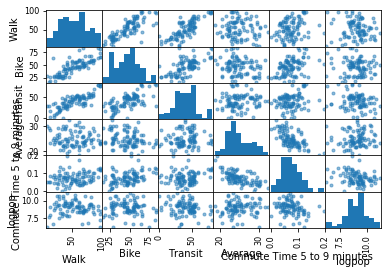

In [83]:
scatter = pd.scatter_matrix(merged[['Walk','Bike','Transit','Average',
                          'Commute Time 5 to 9 minutes', 'logpop']])

In [47]:
stats.pearsonr(merged['Transit'], merged['Average'])

(0.066247575753220891, 0.52582132014408833)

In [48]:
stats.pearsonr(merged['Bike'], merged['Average'])

(-0.24671786303607385, 0.016521108037360382)

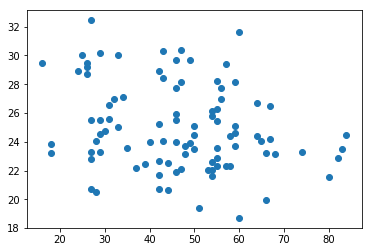

In [49]:
plt.scatter(merged['Bike'], merged['Average'])

In [86]:
stats.pearsonr(merged['Walk'], merged['Average'])

(-0.08828889868494337, 0.39744473949761594)

In [51]:
stats.pearsonr(merged['Transit'], merged['Commute Time 5 to 9 minutes'])

(0.17253174456929629, 0.096338275178600843)

In [52]:
stats.pearsonr(merged['Bike'], merged['Commute Time 5 to 9 minutes'])

(0.42802175700572026, 1.6828002854660239e-05)

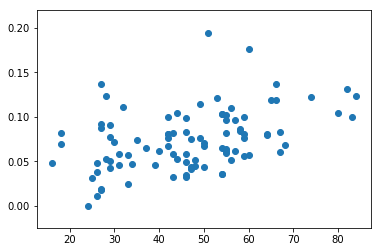

In [53]:
plt.scatter(merged['Bike'], merged['Commute Time 5 to 9 minutes'])

In [54]:
stats.pearsonr(merged['Bike'], merged['Commute Time 30 to 34 minutes'])

(-0.37182610572197805, 0.00022427660132222864)

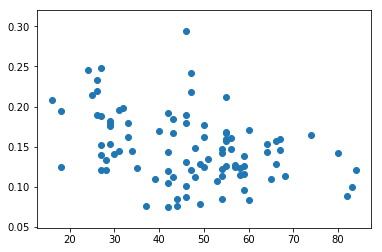

In [55]:
plt.scatter(merged['Bike'], merged['Commute Time 30 to 34 minutes'])

In [56]:
stats.pearsonr(merged['Walk'], merged['Commute Time 5 to 9 minutes'])

(0.25798036198209495, 0.012059627125456333)

In [88]:
import patsy
import statsmodels.api as sm
outcome, predictors = patsy.dmatrices('Average ~ \
                                      Bike + Walk + Transit',
                                          merged)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Average   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     5.160
Date:                Sat, 03 Jun 2017   Prob (F-statistic):            0.00245
Time:                        18:32:38   Log-Likelihood:                -228.60
No. Observations:                  94   AIC:                             465.2
Df Residuals:                      90   BIC:                             475.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     26.7372      0.966     27.678      0.0

# Income and housing prices